<a href="https://colab.research.google.com/github/valenciaeurelia/analisis-sentimen-ruukesehatan/blob/main/sentimen_ruu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Library & Packages

In [1]:
!pip install pandas
!curl -sL https://deb.nodesource.com/setup_18.x | sudo -E bash -
!sudo apt-get install -y nodejs


## Installing the NodeSource Node.js 18.x repo...


## Populating apt-get cache...

+ apt-get update
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,347 kB]
Get:1

In [2]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=eed32750cde7c9bc624d73ac8940f64506590eaa5c0f4017b8b0920a6342b335
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling ch

In [3]:
!pip install nltk

In [4]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00


In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
# from googletrans import Translator

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

#### Crawling Data

In [ ]:
# Crawl Data

filename = 'ruu-kesehatan.csv'
search_keyword = 'ruu kesehatan lang:id until:2023-07-16 since:2023-06-01'
limit = 500

!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token ""


Welcome to the Twitter Crawler 🕷️

This script uses Chromium Browser to crawl data from Twitter with *your* Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.

? What's your Twitter auth token? › 78? What's your Twitter auth token? › *78? What's your Twitter auth token? › **78? What's your Twitter auth token? › ***78? What's your Twitter auth token? › ****78? What's your Twitter auth token? › *****78? What's your Twitter auth token? › ******78? What's your Twitter auth token? › *******78? What's your Twitter auth token? › ********78? What's your Twitter auth token? › *********78? What's your Twitter auth token? › **********78? What's your Twitter auth token? › ***********78? What's your Twitter auth token? › ************78? What's your Twitter auth token? › *************78? What's your Twitter auth token? › **********

In [ ]:
# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=";")

In [ ]:
display(df)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sat Jul 15 11:47:52 +0000 2023,1680182387349782528,"[Kabar] RUU Kesehatan Disahkan, Pemerhati: Buk...",0,0,0,0,in,1609034038714707969,1680182387349782528,SholikhahWiwik,https://twitter.com/SholikhahWiwik/status/1680...
1,Sat Jul 15 11:44:11 +0000 2023,1680181462472228864,RUU Kesehatan ini memcangkup juga ttg obat2an ...,0,0,0,0,in,213569206,1680181462472228864,adiawae,https://twitter.com/adiawae/status/16801814624...
2,Sat Jul 15 11:26:04 +0000 2023,1680176902659805186,IDI menegaskan pihaknya turut membantu dokter ...,0,1,0,1,in,23343960,1680176902659805186,kompascom,https://twitter.com/kompascom/status/168017690...
3,Sat Jul 15 11:17:24 +0000 2023,1680174723366555648,Ambu2ne osjur fh ngomongke RUU kesehatan i,0,0,0,0,in,1155813140879179776,1680174723366555648,eksporjahe,https://twitter.com/eksporjahe/status/16801747...
4,Sat Jul 15 10:25:28 +0000 2023,1680161651281260546,@arisesaja @DrEvaChaniago Kalo begitu anda har...,0,0,0,0,in,1483614343195693056,1680060735655669762,NordickVv,https://twitter.com/NordickVv/status/168016165...
...,...,...,...,...,...,...,...,...,...,...,...,...
484,Wed Jul 12 20:38:45 +0000 2023,1679228827413929984,@Gojekmilitan @ZaiQyoto1 Aamiin Wajib di swee...,0,1,2,9,in,1657682046016454664,1678793274721714184,21_mozza,https://twitter.com/21_mozza/status/1679228827...
485,Wed Jul 12 20:34:38 +0000 2023,1679227790556798976,"Tolak RUU Kesehatan, PKS Sesalkan Pemerintah T...",0,0,0,0,in,217068660,1679227790556798976,imediacyber,https://twitter.com/imediacyber/status/1679227...
486,Wed Jul 12 20:33:01 +0000 2023,1679227383528951808,"Mandatory Spending Dihapus, PKS Konsisten Tola...",0,0,0,0,in,217068660,1679227383528951808,imediacyber,https://twitter.com/imediacyber/status/1679227...
487,Wed Jul 12 20:13:34 +0000 2023,1679222489040449536,"@prastow RUU kesehatan masuk akal, STR memang ...",0,0,0,0,in,1449053263,1678916458452254721,AryaZulvikar,https://twitter.com/AryaZulvikar/status/167922...


- Membuat DataFrame baru dengan kolom yang tertentu

In [ ]:
ruu_df = df[['created_at', 'username', 'full_text']]

- Mengubah nama kolom pada tabel & menampilkan DataFrame baru

In [ ]:
ruu_df.rename(columns={
    'created_at': 'date',
    'username': 'username',
    'full_text': 'tweet'
}, inplace=True)

# Menyimpan DataFrame ke dalam file CSV
ruu_df.to_csv('ruu.csv', index=False)

# Menampilkan data
display(ruu_df)

<ipython-input-10-28332685377e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ruu_df.rename(columns={


,date,username,tweet
0,Sat Jul 15 11:47:52 +0000 2023,SholikhahWiwik,"[Kabar] RUU Kesehatan Disahkan, Pemerhati: Buk..."
1,Sat Jul 15 11:44:11 +0000 2023,adiawae,RUU Kesehatan ini memcangkup juga ttg obat2an ...
2,Sat Jul 15 11:26:04 +0000 2023,kompascom,IDI menegaskan pihaknya turut membantu dokter ...
3,Sat Jul 15 11:17:24 +0000 2023,eksporjahe,Ambu2ne osjur fh ngomongke RUU kesehatan i
4,Sat Jul 15 10:25:28 +0000 2023,NordickVv,@arisesaja @DrEvaChaniago Kalo begitu anda har...
...,...,...,...
484,Wed Jul 12 20:38:45 +0000 2023,21_mozza,@Gojekmilitan @ZaiQyoto1 Aamiin Wajib di swee...
485,Wed Jul 12 20:34:38 +0000 2023,imediacyber,"Tolak RUU Kesehatan, PKS Sesalkan Pemerintah T..."
486,Wed Jul 12 20:33:01 +0000 2023,imediacyber,"Mandatory Spending Dihapus, PKS Konsisten Tola..."
487,Wed Jul 12 20:13:34 +0000 2023,AryaZulvikar,"@prastow RUU kesehatan masuk akal, STR memang ..."


# `Section 1` Dataset Overview

- Connect to Google Drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
ruu_kesehatan_df = pd.read_csv("/content/drive/MyDrive/data/ruu.csv")

- Menampilkan data

In [3]:
display(ruu_kesehatan_df)

,date,username,tweet
0,Sat Jul 15 11:47:52 +0000 2023,SholikhahWiwik,"[Kabar] RUU Kesehatan Disahkan, Pemerhati: Buk..."
1,Sat Jul 15 11:44:11 +0000 2023,adiawae,RUU Kesehatan ini memcangkup juga ttg obat2an ...
2,Sat Jul 15 11:26:04 +0000 2023,kompascom,IDI menegaskan pihaknya turut membantu dokter ...
3,Sat Jul 15 11:17:24 +0000 2023,eksporjahe,Ambu2ne osjur fh ngomongke RUU kesehatan i
4,Sat Jul 15 10:25:28 +0000 2023,NordickVv,@arisesaja @DrEvaChaniago Kalo begitu anda har...
...,...,...,...
484,Wed Jul 12 20:38:45 +0000 2023,21_mozza,@Gojekmilitan @ZaiQyoto1 Aamiin Wajib di swee...
485,Wed Jul 12 20:34:38 +0000 2023,imediacyber,"Tolak RUU Kesehatan, PKS Sesalkan Pemerintah T..."
486,Wed Jul 12 20:33:01 +0000 2023,imediacyber,"Mandatory Spending Dihapus, PKS Konsisten Tola..."
487,Wed Jul 12 20:13:34 +0000 2023,AryaZulvikar,"@prastow RUU kesehatan masuk akal, STR memang ..."


- Cek jumlah data dan tipe data

In [4]:
ruu_kesehatan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      489 non-null    object
 1   username  489 non-null    object
 2   tweet     489 non-null    object
dtypes: object(3)
memory usage: 11.6+ KB


- Mengubah tipe data 'date' dari *object* menjadi *datetime*

In [5]:
datetime_columns = ["date"]

for column in datetime_columns:
  ruu_kesehatan_df[column] = pd.to_datetime(ruu_kesehatan_df[column])

In [6]:
ruu_kesehatan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      489 non-null    datetime64[ns, UTC]
 1   username  489 non-null    object             
 2   tweet     489 non-null    object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 11.6+ KB


- Cek *missing value*

In [7]:
ruu_kesehatan_df.isna().sum()

date        0
username    0
tweet       0
dtype: int64

- Menghapus data duplikat

In [8]:
print("Jumlah duplikasi:", ruu_kesehatan_df.duplicated().sum())

Jumlah duplikasi: 0


# `Section 2` Cleaning & Normalized Data

#### 1) Word & Tweet Features

- Mengubah tweet menjadi lowercase

In [9]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

- Menghapus URL

In [10]:
def remove_urls(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

- Menghapus text dan kata yang berisi '@'

In [11]:
def remove_mentions(tweet):
    # Menghapus kata-kata yang dimulai dengan '@'
    tweet = re.sub(r'@\w+\s?', '', tweet)
    # Menghapus multiple spaces yang mungkin muncul setelah menghapus kata-kata
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

- Menghapus semua tanda baca, special chars, dan emoji

In [12]:
def remove_punctuation(tweet, default_replace=""):
    tweet = re.sub(r'[^\w\s]', default_replace, tweet)
    return tweet

- Menghapus digit

In [13]:
def remove_digits(tweet, default_replace=""):
    tweet = re.sub(r'\d', default_replace, tweet)
    return tweet

- Definisikan semua function

In [14]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = to_lowercase(tweet) # lowercase
  tweet = remove_mentions(tweet) # mentions
  tweet = remove_punctuation(tweet) # tanda baca, special chars dan emoji
  tweet = remove_digits(tweet) # digit
  tweet = remove_urls(tweet) # urls
  # tweet = remove_custom_words(tweet) # custom words
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  return tweet

- Apply function memproses seluruh teks di kolom "tweet"

In [15]:
ruu_kesehatan_df['tweet'] = ruu_kesehatan_df['tweet'].apply(process_tweet, verbose=False)
ruu_kesehatan_df

,date,username,tweet
0,2023-07-15 11:47:52+00:00,SholikhahWiwik,kabar ruu kesehatan disahkan pemerhati bukti d...
1,2023-07-15 11:44:11+00:00,adiawae,ruu kesehatan ini memcangkup juga ttg obatan g...
2,2023-07-15 11:26:04+00:00,kompascom,idi menegaskan pihaknya turut membantu dokter ...
3,2023-07-15 11:17:24+00:00,eksporjahe,ambune osjur fh ngomongke ruu kesehatan i
4,2023-07-15 10:25:28+00:00,NordickVv,kalo begitu anda harus dukung ruu kesehatan in...
...,...,...,...
484,2023-07-12 20:38:45+00:00,21_mozza,aamiin wajib di sweeping sampe ke akar² nya ka...
485,2023-07-12 20:34:38+00:00,imediacyber,tolak ruu kesehatan pks sesalkan pemerintah ta...
486,2023-07-12 20:33:01+00:00,imediacyber,mandatory spending dihapus pks konsisten tolak...
487,2023-07-12 20:13:34+00:00,AryaZulvikar,ruu kesehatan masuk akal str memang seharusnya...


- Memeriksa tweet duplicate

In [16]:
print("Jumlah duplikasi pada kolom 'tweet':", ruu_kesehatan_df.duplicated(subset=['tweet', 'username']).sum())

Jumlah duplikasi pada kolom 'tweet': 6


- Menampilkan tweet yang duplikat dari username yang sama

In [17]:
duplicate_tweets = ruu_kesehatan_df[ruu_kesehatan_df.duplicated(subset=['tweet', 'username'], keep=False)]
duplicate_tweets

,date,username,tweet
54,2023-07-14 22:00:05+00:00,TriziMeka,bagian health for all urgensi politik kesehata...
55,2023-07-14 21:59:34+00:00,TriziMeka,bagian health for all urgensi politik kesehata...
56,2023-07-14 21:58:44+00:00,TriziMeka,bagian health for all urgensi politik kesehata...
146,2023-07-14 05:58:26+00:00,DrEvaChaniago,utas kesehatan diperkosa rakyat diperdaya ruu ...
149,2023-07-14 05:43:52+00:00,DrEvaChaniago,utas kesehatan diperkosa rakyat diperdaya ruu ...
368,2023-07-13 03:59:48+00:00,BRKVision2023,profesor kesehatan sdh protes terburu mensahka...
438,2023-07-13 01:18:47+00:00,BRKVision2023,profesor kesehatan sdh protes terburu mensahka...
439,2023-07-13 01:18:34+00:00,BRKVision2023,profesor kesehatan sdh protes terburu mensahka...
468,2023-07-12 22:59:09+00:00,BRKVision2023,profesor kesehatan sdh protes terburu mensahka...


- Menghapus kolom duplikat

In [18]:
ruu_kesehatan_df.drop_duplicates(subset=['tweet', 'username'], keep='first', inplace=True)

In [19]:
print("Jumlah duplikasi pada kolom 'tweet' dari username yang sama:", ruu_kesehatan_df.duplicated(subset=['tweet', 'username']).sum())

Jumlah duplikasi pada kolom 'tweet' dari username yang sama: 0


#### 2) Tokenization & Stopwords

###### Tokenisasi

- Tokenisasi teks menjadi kata-kata

In [20]:
nltk.download('punkt')

# Membuat tabel baru "token" untuk menyimpan hasil tokenisasi setiap tweet
ruu_kesehatan_df['tokens'] = ruu_kesehatan_df['tweet'].apply(word_tokenize)
ruu_kesehatan_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,date,username,tweet,tokens
0,2023-07-15 11:47:52+00:00,SholikhahWiwik,kabar ruu kesehatan disahkan pemerhati bukti d...,"[kabar, ruu, kesehatan, disahkan, pemerhati, b..."
1,2023-07-15 11:44:11+00:00,adiawae,ruu kesehatan ini memcangkup juga ttg obatan g...,"[ruu, kesehatan, ini, memcangkup, juga, ttg, o..."
2,2023-07-15 11:26:04+00:00,kompascom,idi menegaskan pihaknya turut membantu dokter ...,"[idi, menegaskan, pihaknya, turut, membantu, d..."
3,2023-07-15 11:17:24+00:00,eksporjahe,ambune osjur fh ngomongke ruu kesehatan i,"[ambune, osjur, fh, ngomongke, ruu, kesehatan, i]"
4,2023-07-15 10:25:28+00:00,NordickVv,kalo begitu anda harus dukung ruu kesehatan in...,"[kalo, begitu, anda, harus, dukung, ruu, keseh..."
...,...,...,...,...
484,2023-07-12 20:38:45+00:00,21_mozza,aamiin wajib di sweeping sampe ke akar² nya ka...,"[aamiin, wajib, di, sweeping, sampe, ke, akar²..."
485,2023-07-12 20:34:38+00:00,imediacyber,tolak ruu kesehatan pks sesalkan pemerintah ta...,"[tolak, ruu, kesehatan, pks, sesalkan, pemerin..."
486,2023-07-12 20:33:01+00:00,imediacyber,mandatory spending dihapus pks konsisten tolak...,"[mandatory, spending, dihapus, pks, konsisten,..."
487,2023-07-12 20:13:34+00:00,AryaZulvikar,ruu kesehatan masuk akal str memang seharusnya...,"[ruu, kesehatan, masuk, akal, str, memang, seh..."


###### Stopwords

- Stopword dalam Bahasa Indonesia

In [21]:
nltk.download('stopwords')

# Library nltk
stop_words = set(stopwords.words('indonesian'))
print(stop_words)

{'seorang', 'digunakan', 'waktunya', 'wahai', 'menanyakan', 'cukuplah', 'karena', 'cara', 'kiranya', 'adanya', 'hal', 'siapapun', 'siapa', 'ucapnya', 'menunjuki', 'serta', 'selama', 'mengibaratkannya', 'boleh', 'disinilah', 'diibaratkan', 'begitukah', 'inikah', 'mereka', 'kelamaan', 'semula', 'perlu', 'kesampaian', 'diperlukan', 'itukah', 'dapat', 'mau', 'dituturkannya', 'kenapa', 'semakin', 'ditunjuki', 'keinginan', 'melihatnya', 'sedikit', 'ke', 'akan', 'membuat', 'bakalan', 'terakhir', 'rupanya', 'keterlaluan', 'menyebutkan', 'terasa', 'lama', 'sekarang', 'diberikan', 'ditunjuknya', 'jika', 'nantinya', 'diperbuatnya', 'terdapat', 'sekali', 'ibarat', 'teringat', 'macam', 'usah', 'waktu', 'dimintai', 'diperlihatkan', 'terjadi', 'tunjuk', 'lagi', 'pentingnya', 'harus', 'pasti', 'jawabnya', 'menunjukkan', 'siap', 'sebisanya', 'nyatanya', 'secara', 'berturut-turut', 'belumlah', 'mana', 'menyampaikan', 'demikianlah', 'mendatang', 'bisa', 'ditambahkan', 'jawaban', 'tersampaikan', 'awal', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
ruu_kesehatan_df['tokens'] = ruu_kesehatan_df['tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
ruu_kesehatan_df

,date,username,tweet,tokens
0,2023-07-15 11:47:52+00:00,SholikhahWiwik,kabar ruu kesehatan disahkan pemerhati bukti d...,"[kabar, ruu, kesehatan, disahkan, pemerhati, b..."
1,2023-07-15 11:44:11+00:00,adiawae,ruu kesehatan ini memcangkup juga ttg obatan g...,"[ruu, kesehatan, memcangkup, ttg, obatan, ga, ..."
2,2023-07-15 11:26:04+00:00,kompascom,idi menegaskan pihaknya turut membantu dokter ...,"[idi, membantu, dokter, diaspora, mudah, indon..."
3,2023-07-15 11:17:24+00:00,eksporjahe,ambune osjur fh ngomongke ruu kesehatan i,"[ambune, osjur, fh, ngomongke, ruu, kesehatan, i]"
4,2023-07-15 10:25:28+00:00,NordickVv,kalo begitu anda harus dukung ruu kesehatan in...,"[kalo, dukung, ruu, kesehatan, ruu, idi, berku..."
...,...,...,...,...
484,2023-07-12 20:38:45+00:00,21_mozza,aamiin wajib di sweeping sampe ke akar² nya ka...,"[aamiin, wajib, sweeping, sampe, akar², nya, k..."
485,2023-07-12 20:34:38+00:00,imediacyber,tolak ruu kesehatan pks sesalkan pemerintah ta...,"[tolak, ruu, kesehatan, pks, sesalkan, pemerin..."
486,2023-07-12 20:33:01+00:00,imediacyber,mandatory spending dihapus pks konsisten tolak...,"[mandatory, spending, dihapus, pks, konsisten,..."
487,2023-07-12 20:13:34+00:00,AryaZulvikar,ruu kesehatan masuk akal str memang seharusnya...,"[ruu, kesehatan, masuk, akal, str, seumur, hid..."


- Stopword Sastrawi

In [23]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# library Sastrawi
sastrawi_stop_words = set(StopWordRemoverFactory().get_stop_words())
print(sastrawi_stop_words)

{'tolong', 'seharusnya', 'tanpa', 'dsb', 'karena', 'yakni', 'hal', 'di', 'seolah', 'tidak', 'demikian', 'sampai', 'serta', 'selain', 'kembali', 'saja', 'boleh', 'hanya', 'amat', 'sudah', 'anu', 'sesuatu', 'kepada', 'mereka', 'begitu', 'tentang', 'seterusnya', 'kemana', 'kita', 'dst', 'bagi', 'demi', 'yang', 'dapat', 'bagaimanapun', 'kenapa', 'ok', 'ke', 'akan', 'ya', 'apalagi', 'pun', 'dan', 'jika', 'oleh', 'ketika', 'tapi', 'namun', 'setelah', 'daripada', 'menurut', 'pada', 'tentu', 'lagi', 'sebab', 'dua', 'harus', 'pasti', 'untuk', 'secara', 'terhadap', 'mari', 'itu', 'sedangkan', 'bisa', 'bahwa', 'setidaknya', 'guna', 'dll', 'mengapa', 'supaya', 'ia', 'adalah', 'oh', 'agak', 'ada', 'nggak', 'dimana', 'nanti', 'walau', 'tetapi', 'antara', 'ingin', 'masih', 'setiap', 'dulunya', 'ini', 'yaitu', 'para', 'dahulu', 'sementara', 'atau', 'sekitar', 'kecuali', 'saya', 'maka', 'kami', 'sebagai', 'pula', 'dari', 'lain', 'sesudah', 'juga', 'toh', 'sebetulnya', 'sehingga', 'belum', 'itulah', 'de

In [24]:
ruu_kesehatan_df['tokens'] = ruu_kesehatan_df['tokens'].apply(lambda tokens: [token for token in tokens if token not in sastrawi_stop_words])
ruu_kesehatan_df

,date,username,tweet,tokens
0,2023-07-15 11:47:52+00:00,SholikhahWiwik,kabar ruu kesehatan disahkan pemerhati bukti d...,"[kabar, ruu, kesehatan, disahkan, pemerhati, b..."
1,2023-07-15 11:44:11+00:00,adiawae,ruu kesehatan ini memcangkup juga ttg obatan g...,"[ruu, kesehatan, memcangkup, ttg, obatan, ga, ..."
2,2023-07-15 11:26:04+00:00,kompascom,idi menegaskan pihaknya turut membantu dokter ...,"[idi, membantu, dokter, diaspora, mudah, indon..."
3,2023-07-15 11:17:24+00:00,eksporjahe,ambune osjur fh ngomongke ruu kesehatan i,"[ambune, osjur, fh, ngomongke, ruu, kesehatan, i]"
4,2023-07-15 10:25:28+00:00,NordickVv,kalo begitu anda harus dukung ruu kesehatan in...,"[kalo, dukung, ruu, kesehatan, ruu, idi, berku..."
...,...,...,...,...
484,2023-07-12 20:38:45+00:00,21_mozza,aamiin wajib di sweeping sampe ke akar² nya ka...,"[aamiin, wajib, sweeping, sampe, akar², nya, k..."
485,2023-07-12 20:34:38+00:00,imediacyber,tolak ruu kesehatan pks sesalkan pemerintah ta...,"[tolak, ruu, kesehatan, pks, sesalkan, pemerin..."
486,2023-07-12 20:33:01+00:00,imediacyber,mandatory spending dihapus pks konsisten tolak...,"[mandatory, spending, dihapus, pks, konsisten,..."
487,2023-07-12 20:13:34+00:00,AryaZulvikar,ruu kesehatan masuk akal str memang seharusnya...,"[ruu, kesehatan, masuk, akal, str, seumur, hid..."


- Stopword stopwords-indotweest [check here](https://github.com/Braincore-id/IndoTWEEST)

In [25]:
# Baca file CSV dengan daftar stop words
stopwords3_df = pd.read_csv('/content/drive/MyDrive/data/stopwords_twitter.csv')
stopwords3_df.head()

,33books
0,a thread
1,affh iyyh
2,aja
3,ajah
4,ajg


In [26]:
indotweest_stopwords = set(stopwords3_df['33books'])
print(indotweest_stopwords)
ruu_kesehatan_df['tokens'] = ruu_kesehatan_df['tokens'].apply(lambda tokens: [token for token in tokens if token not in indotweest_stopwords])
ruu_kesehatan_df

{'nya', 'tapikan', 'sender', 'kamu nanyea', 'noob', 'tolong', 'Bio', 'cm', 'copee', 'hm', 'ingfo', 'dm', 'gass', 'spotify', 'i', 'di', 'kaa', 'maseh', 'elus', 'com', 'mulu', 'dah', 'nahloh', 'tk', 'kagak', 'ayo', 'anjrit', 'temen', 'lagih', 'ges', 'bokap', 'jajan', 'tidaa', 'dgn', 'wa', 'bray', 'gw', 'nak', 'yah', 'ajah', 'give away', 'giveaway', 'gua', 'ngabs', 'ss', 'tuh', 'alter', 'gini', 'gasih', 'lu', 'tp', 'paansi', 'rt', 'copi', 'moots', 'yoi', 'an', 'kek', 'tbl', 'nih', 'hiyahiya', 'gimana', 'cmiiw', 'kntl', 'premium', 'begonoh', 'nahlo', 'order', 'dech', 'nder', 'hehe', 'ok', 'slebew', 'dana', 'depan', 'engga', 'okee', 'au', 'wts', 'gassin', 'via', 'emang', 'ya', 'togelchina', 'teros', 'yak', 'nu', 'mazeeh', 'info', 'nggk', 'monyeet', 'smpe', 'gipewey', 'casino', 'sealed', 'tu', 'qrt', 'anjir', 'tokped', 'emng', 'penjilat', 'ma', 'wkwkwk', 'yuk', 'jg', 'gpp', 'tags', 'teross', 'link', 'bangsat', 'bosku', 'kl', 'nyet', 'haha', 'pp', 'preloved ', 'emberan', 'kyaa', 'maaf', 'TIA'

,date,username,tweet,tokens
0,2023-07-15 11:47:52+00:00,SholikhahWiwik,kabar ruu kesehatan disahkan pemerhati bukti d...,"[kabar, ruu, kesehatan, disahkan, pemerhati, b..."
1,2023-07-15 11:44:11+00:00,adiawae,ruu kesehatan ini memcangkup juga ttg obatan g...,"[ruu, kesehatan, memcangkup, ttg, obatan, farm..."
2,2023-07-15 11:26:04+00:00,kompascom,idi menegaskan pihaknya turut membantu dokter ...,"[idi, membantu, dokter, diaspora, mudah, indon..."
3,2023-07-15 11:17:24+00:00,eksporjahe,ambune osjur fh ngomongke ruu kesehatan i,"[ambune, osjur, fh, ngomongke, ruu, kesehatan]"
4,2023-07-15 10:25:28+00:00,NordickVv,kalo begitu anda harus dukung ruu kesehatan in...,"[dukung, ruu, kesehatan, ruu, idi, berkuasa, d..."
...,...,...,...,...
484,2023-07-12 20:38:45+00:00,21_mozza,aamiin wajib di sweeping sampe ke akar² nya ka...,"[aamiin, wajib, sweeping, akar², karna, petaka..."
485,2023-07-12 20:34:38+00:00,imediacyber,tolak ruu kesehatan pks sesalkan pemerintah ta...,"[tolak, ruu, kesehatan, pks, sesalkan, pemerin..."
486,2023-07-12 20:33:01+00:00,imediacyber,mandatory spending dihapus pks konsisten tolak...,"[mandatory, spending, dihapus, pks, konsisten,..."
487,2023-07-12 20:13:34+00:00,AryaZulvikar,ruu kesehatan masuk akal str memang seharusnya...,"[ruu, kesehatan, masuk, akal, str, seumur, hid..."


- `FreqDist` melihat frekuensi kemunculan kata

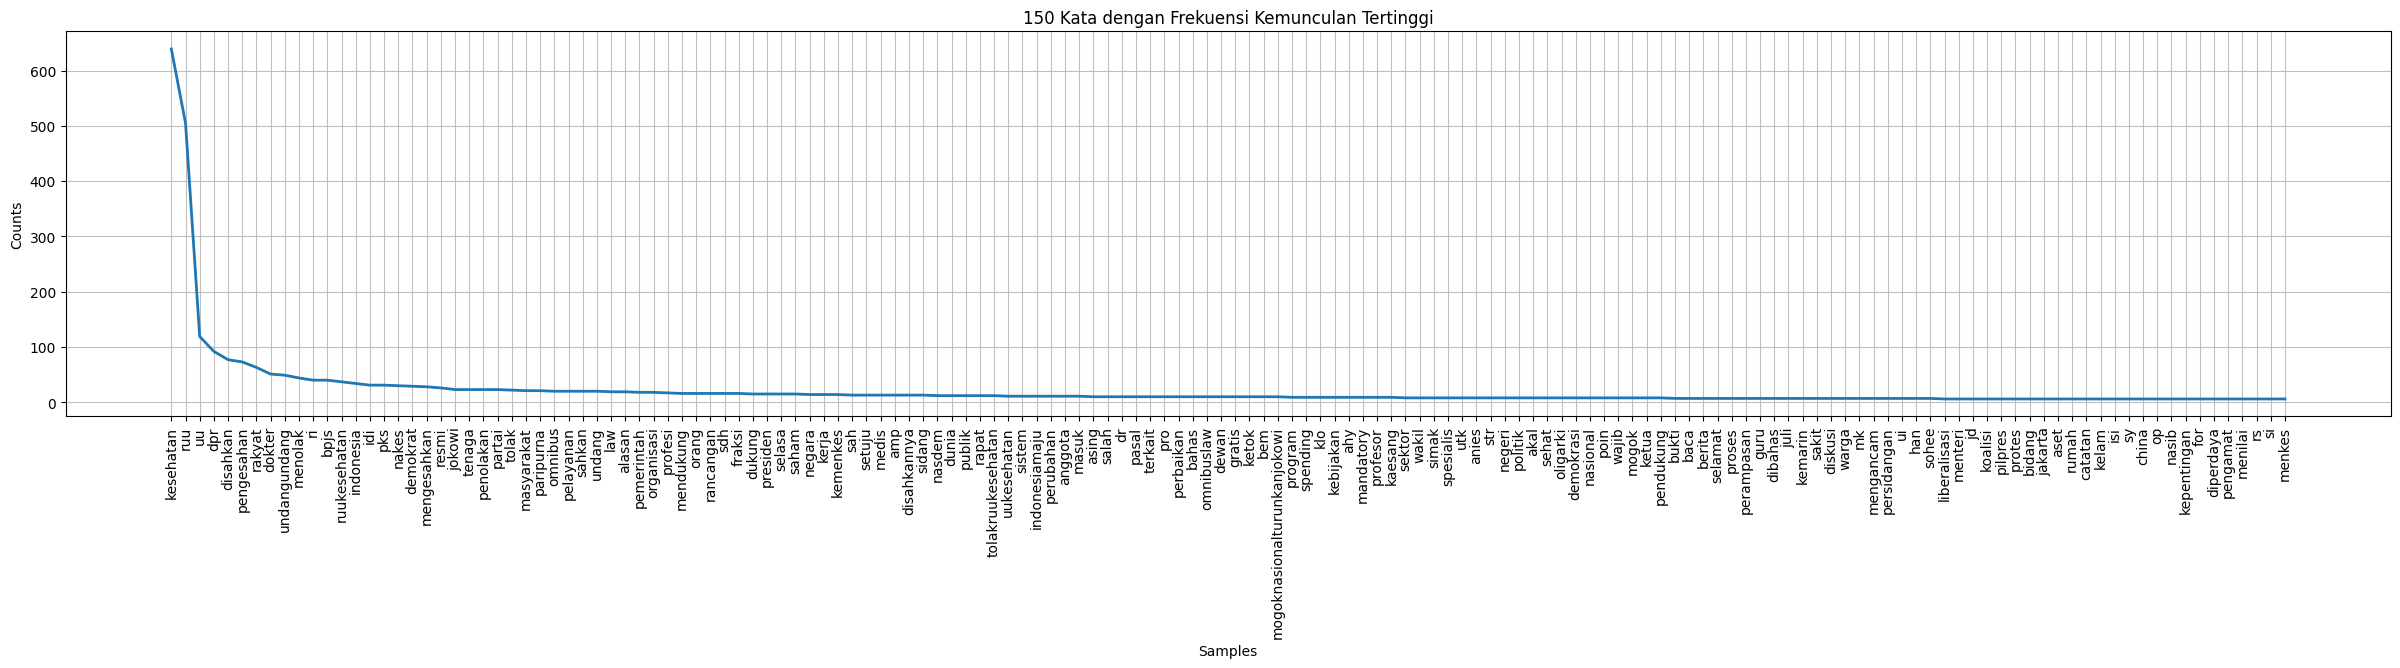

In [27]:
# Membuat plot frekuensi kemunculan kata
plt.figure(figsize=(30, 5))
plt.title('150 Kata dengan Frekuensi Kemunculan Tertinggi')
fdist_all = FreqDist([token for tokens in ruu_kesehatan_df['tokens'] for token in tokens])
fdist_all.plot(150, cumulative=False)
plt.show()

- Menghapus kata yang tidak sesuai/tidak ada korelasi

In [28]:
# Kata yang akan dihapus
remove_custom_words = ['sdh', 'utk', 'klo', 'amp', 'bs', 'han', 'sohee', 'jd', 'cc', 'for', 'str', 'sy', 'op', 'ala', 'mah']

# Menghapus kata-kata yang ada dalam kata_hapus dari setiap token dalam kolom "tokens"
ruu_kesehatan_df['tokens'] = ruu_kesehatan_df['tokens'].apply(lambda tokens: [token for token in tokens if token not in remove_custom_words])

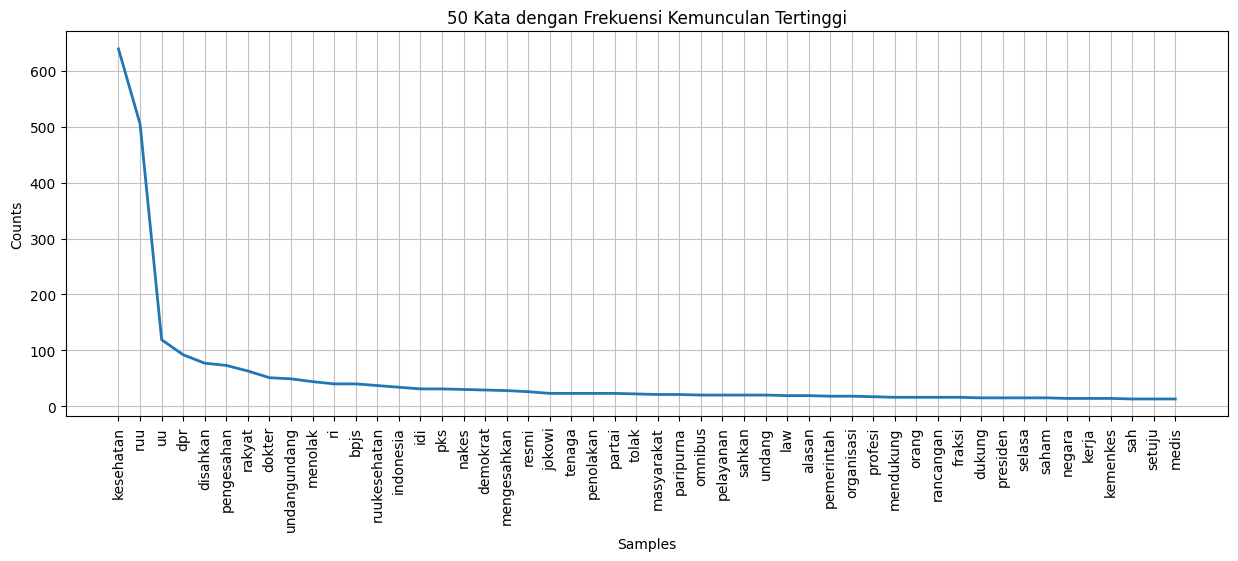

In [29]:
# Membuat plot frekuensi kemunculan kata
plt.figure(figsize=(15, 5))
plt.title('50 Kata dengan Frekuensi Kemunculan Tertinggi')
fdist_all = FreqDist([token for tokens in ruu_kesehatan_df['tokens'] for token in tokens])
fdist_all.plot(50, cumulative=False)
plt.show()

#### 3) Stemming

- Import libraries dan modules untuk stemming

In [30]:
# Buat objek stemmer Sastrawi
factory = StemmerFactory()
sastrawi_stemmer = factory.create_stemmer()

pd.set_option('display.max_colwidth', None)
ruu_kesehatan_df['tweet_stem'] = ruu_kesehatan_df['tokens'].apply(lambda tokens: [sastrawi_stemmer.stem(token) for token in tokens])
ruu_kesehatan_df

,date,username,tweet,tokens,tweet_stem
0,2023-07-15 11:47:52+00:00,SholikhahWiwik,kabar ruu kesehatan disahkan pemerhati bukti dedikasi negara untuk kapitalisme,"[kabar, ruu, kesehatan, disahkan, pemerhati, bukti, dedikasi, negara, kapitalisme]","[kabar, ruu, sehat, sah, perhati, bukti, dedikasi, negara, kapitalisme]"
1,2023-07-15 11:44:11+00:00,adiawae,ruu kesehatan ini memcangkup juga ttg obatan ga sih atau farmasi,"[ruu, kesehatan, memcangkup, ttg, obatan, farmasi]","[ruu, sehat, memcangkup, ttg, obat, farmasi]"
2,2023-07-15 11:26:04+00:00,kompascom,idi menegaskan pihaknya turut membantu dokter diaspora untuk dapat mudah kembali ke indonesia sebelum ruu kesehatan disahkan,"[idi, membantu, dokter, diaspora, mudah, indonesia, ruu, kesehatan, disahkan]","[idi, bantu, dokter, diaspora, mudah, indonesia, ruu, sehat, sah]"
3,2023-07-15 11:17:24+00:00,eksporjahe,ambune osjur fh ngomongke ruu kesehatan i,"[ambune, osjur, fh, ngomongke, ruu, kesehatan]","[ambune, osjur, fh, ngomongke, ruu, sehat]"
4,2023-07-15 10:25:28+00:00,NordickVv,kalo begitu anda harus dukung ruu kesehatan ini karena ruu ini akan membuat idi tak berkuasa lagi sehingga para dokter indonesia yg terpaksa kerja disingapore dll karna tidak diberi izin praktik oleh idi bisa pulang dan praktik diindonesia,"[dukung, ruu, kesehatan, ruu, idi, berkuasa, dokter, indonesia, terpaksa, kerja, disingapore, karna, izin, praktik, idi, pulang, praktik, diindonesia]","[dukung, ruu, sehat, ruu, idi, kuasa, dokter, indonesia, paksa, kerja, disingapore, karna, izin, praktik, idi, pulang, praktik, indonesia]"
...,...,...,...,...,...
484,2023-07-12 20:38:45+00:00,21_mozza,aamiin wajib di sweeping sampe ke akar² nya karna semua petaka di negri ini berasal dari hewan moncong putih yg baru² kebijakan nya yg menumbalkan rakyat yaitu ruukesehatan,"[aamiin, wajib, sweeping, akar², karna, petaka, negri, berasal, hewan, moncong, putih, baru², kebijakan, menumbalkan, rakyat, ruukesehatan]","[aamiin, wajib, sweeping, akar, karna, petaka, negri, asal, hewan, moncong, putih, baru, bijak, tumbal, rakyat, ruukesehatan]"
485,2023-07-12 20:34:38+00:00,imediacyber,tolak ruu kesehatan pks sesalkan pemerintah tak dengar aspirasi nakes,"[tolak, ruu, kesehatan, pks, sesalkan, pemerintah, dengar, aspirasi, nakes]","[tolak, ruu, sehat, pks, sesal, perintah, dengar, aspirasi, nakes]"
486,2023-07-12 20:33:01+00:00,imediacyber,mandatory spending dihapus pks konsisten tolak pengesahan ruu kesehatan,"[mandatory, spending, dihapus, pks, konsisten, tolak, pengesahan, ruu, kesehatan]","[mandatory, spending, hapus, pks, konsisten, tolak, kesah, ruu, sehat]"
487,2023-07-12 20:13:34+00:00,AryaZulvikar,ruu kesehatan masuk akal str memang seharusnya seumur hidup krn itu mah mirip ktp yg diperpanjang itu ijin praktek dokter asing sewajarnya masuk supaya org indo g berobat di malaysiaamp singapura,"[ruu, kesehatan, masuk, akal, seumur, hidup, ktp, diperpanjang, ijin, praktek, dokter, asing, sewajarnya, masuk, org, indo, g, berobat, malaysiaamp, singapura]","[ruu, sehat, masuk, akal, umur, hidup, ktp, panjang, ijin, praktek, dokter, asing, wajar, masuk, org, indo, g, obat, malaysiaamp, singapura]"


# `Section 3` Labeling Data (Positif & Negatif)

###### Buat DataFrame baru dari hasil stem

- Membuat function join untuk menggabungkan karakter pada kolom tweet_stem

In [31]:
def join(tokens):
    return " ".join(tokens)

# Membuat DataFrame baru dari hasil stem dan menggabungkan token menjadi kalimat
ruu_kesehatan_df['tweet_stem'] = ruu_kesehatan_df['tweet_stem'].apply(join)
ruu_kesehatan_df

,date,username,tweet,tokens,tweet_stem
0,2023-07-15 11:47:52+00:00,SholikhahWiwik,kabar ruu kesehatan disahkan pemerhati bukti dedikasi negara untuk kapitalisme,"[kabar, ruu, kesehatan, disahkan, pemerhati, bukti, dedikasi, negara, kapitalisme]",kabar ruu sehat sah perhati bukti dedikasi negara kapitalisme
1,2023-07-15 11:44:11+00:00,adiawae,ruu kesehatan ini memcangkup juga ttg obatan ga sih atau farmasi,"[ruu, kesehatan, memcangkup, ttg, obatan, farmasi]",ruu sehat memcangkup ttg obat farmasi
2,2023-07-15 11:26:04+00:00,kompascom,idi menegaskan pihaknya turut membantu dokter diaspora untuk dapat mudah kembali ke indonesia sebelum ruu kesehatan disahkan,"[idi, membantu, dokter, diaspora, mudah, indonesia, ruu, kesehatan, disahkan]",idi bantu dokter diaspora mudah indonesia ruu sehat sah
3,2023-07-15 11:17:24+00:00,eksporjahe,ambune osjur fh ngomongke ruu kesehatan i,"[ambune, osjur, fh, ngomongke, ruu, kesehatan]",ambune osjur fh ngomongke ruu sehat
4,2023-07-15 10:25:28+00:00,NordickVv,kalo begitu anda harus dukung ruu kesehatan ini karena ruu ini akan membuat idi tak berkuasa lagi sehingga para dokter indonesia yg terpaksa kerja disingapore dll karna tidak diberi izin praktik oleh idi bisa pulang dan praktik diindonesia,"[dukung, ruu, kesehatan, ruu, idi, berkuasa, dokter, indonesia, terpaksa, kerja, disingapore, karna, izin, praktik, idi, pulang, praktik, diindonesia]",dukung ruu sehat ruu idi kuasa dokter indonesia paksa kerja disingapore karna izin praktik idi pulang praktik indonesia
...,...,...,...,...,...
484,2023-07-12 20:38:45+00:00,21_mozza,aamiin wajib di sweeping sampe ke akar² nya karna semua petaka di negri ini berasal dari hewan moncong putih yg baru² kebijakan nya yg menumbalkan rakyat yaitu ruukesehatan,"[aamiin, wajib, sweeping, akar², karna, petaka, negri, berasal, hewan, moncong, putih, baru², kebijakan, menumbalkan, rakyat, ruukesehatan]",aamiin wajib sweeping akar karna petaka negri asal hewan moncong putih baru bijak tumbal rakyat ruukesehatan
485,2023-07-12 20:34:38+00:00,imediacyber,tolak ruu kesehatan pks sesalkan pemerintah tak dengar aspirasi nakes,"[tolak, ruu, kesehatan, pks, sesalkan, pemerintah, dengar, aspirasi, nakes]",tolak ruu sehat pks sesal perintah dengar aspirasi nakes
486,2023-07-12 20:33:01+00:00,imediacyber,mandatory spending dihapus pks konsisten tolak pengesahan ruu kesehatan,"[mandatory, spending, dihapus, pks, konsisten, tolak, pengesahan, ruu, kesehatan]",mandatory spending hapus pks konsisten tolak kesah ruu sehat
487,2023-07-12 20:13:34+00:00,AryaZulvikar,ruu kesehatan masuk akal str memang seharusnya seumur hidup krn itu mah mirip ktp yg diperpanjang itu ijin praktek dokter asing sewajarnya masuk supaya org indo g berobat di malaysiaamp singapura,"[ruu, kesehatan, masuk, akal, seumur, hidup, ktp, diperpanjang, ijin, praktek, dokter, asing, sewajarnya, masuk, org, indo, g, berobat, malaysiaamp, singapura]",ruu sehat masuk akal umur hidup ktp panjang ijin praktek dokter asing wajar masuk org indo g obat malaysiaamp singapura


- Buat DataFrame baru dan save ke dalam file CSV dengan hanya mengambil kolom tertentu

In [41]:
# Menyimpan kolom "date", "username", dan "tokens"
selected_columns = ['date', 'username', 'tweet_stem']

# Memilih hanya kolom-kolom yang ingin disimpan
ruu_cleaned_df = ruu_kesehatan_df[selected_columns]
ruu_cleaned_df.to_csv('hasil_stem_data.csv')

In [42]:
ruu_cleaned_df

,date,username,tweet_stem
0,2023-07-15 11:47:52+00:00,SholikhahWiwik,kabar ruu sehat sah perhati bukti dedikasi negara kapitalisme
1,2023-07-15 11:44:11+00:00,adiawae,ruu sehat memcangkup ttg obat farmasi
2,2023-07-15 11:26:04+00:00,kompascom,idi bantu dokter diaspora mudah indonesia ruu sehat sah
3,2023-07-15 11:17:24+00:00,eksporjahe,ambune osjur fh ngomongke ruu sehat
4,2023-07-15 10:25:28+00:00,NordickVv,dukung ruu sehat ruu idi kuasa dokter indonesia paksa kerja disingapore karna izin praktik idi pulang praktik indonesia
...,...,...,...
484,2023-07-12 20:38:45+00:00,21_mozza,aamiin wajib sweeping akar karna petaka negri asal hewan moncong putih baru bijak tumbal rakyat ruukesehatan
485,2023-07-12 20:34:38+00:00,imediacyber,tolak ruu sehat pks sesal perintah dengar aspirasi nakes
486,2023-07-12 20:33:01+00:00,imediacyber,mandatory spending hapus pks konsisten tolak kesah ruu sehat
487,2023-07-12 20:13:34+00:00,AryaZulvikar,ruu sehat masuk akal umur hidup ktp panjang ijin praktek dokter asing wajar masuk org indo g obat malaysiaamp singapura


##### Labelling

- Source https://github.com/fajri91/InSet

In [43]:
import csv

# Load positive and negative words with their corresponding scores into dictionaries
positive_file = {}
negative_file = {}

# Function to skip the header row in CSV file
def skip_header(csv_reader):
    next(csv_reader, None)  # Skips the header row

# Load positive file
with open('/content/drive/MyDrive/data/InSet/positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    skip_header(reader)  # Skip the header row
    for row in reader:
        positive_file[row[0]] = int(row[1])

# Load negative file
with open('/content/drive/MyDrive/data/InSet/negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    skip_header(reader)  # Skip the header row
    for row in reader:
        negative_file[row[0]] = int(row[1])

- Sentiment Polaritas

In [44]:
def sentiment_polarity(tweet_stem):
    score = 0
    words = tweet_stem.split()  # Tokenisasi teks dalam kolom "Stem" menjadi kata-kata

    for word in words:
        if word in positive_file:
            score += positive_file[word]

    for word in words:
        if word in negative_file:
            score += negative_file[word]

    polarity = 'positive' if score > 0 else 'negative'

    return score, polarity

-  Melakukan perhitungan polaritas dengan function sentiment_polarity


In [45]:
ruu_cleaned_df['score lexicon'], ruu_cleaned_df['sentiment lexicon'] = zip(*ruu_cleaned_df['tweet_stem'].apply(sentiment_polarity))

<ipython-input-45-25f452505e0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ruu_cleaned_df['score lexicon'], ruu_cleaned_df['sentiment lexicon'] = zip(*ruu_cleaned_df['tweet_stem'].apply(sentiment_polarity))
<ipython-input-45-25f452505e0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ruu_cleaned_df['score lexicon'], ruu_cleaned_df['sentiment lexicon'] = zip(*ruu_cleaned_df['tweet_stem'].apply(sentiment_polarity))


- Menghitung banyaknya jumlah token yang sentiment polaritynya negative/positive

In [46]:
token_counts = ruu_cleaned_df['sentiment lexicon'].value_counts(dropna=False)

print("Banyaknya Jumlah Token dengan Sentiment Polarity:")
print(token_counts)

Banyaknya Jumlah Token dengan Sentiment Polarity:
positive    294
negative    189
Name: sentiment lexicon, dtype: int64


In [47]:
pd.set_option('display.max_colwidth', None)
ruu_cleaned_df

,date,username,tweet_stem,score lexicon,sentiment lexicon
0,2023-07-15 11:47:52+00:00,SholikhahWiwik,kabar ruu sehat sah perhati bukti dedikasi negara kapitalisme,-1,negative
1,2023-07-15 11:44:11+00:00,adiawae,ruu sehat memcangkup ttg obat farmasi,0,negative
2,2023-07-15 11:26:04+00:00,kompascom,idi bantu dokter diaspora mudah indonesia ruu sehat sah,5,positive
3,2023-07-15 11:17:24+00:00,eksporjahe,ambune osjur fh ngomongke ruu sehat,3,positive
4,2023-07-15 10:25:28+00:00,NordickVv,dukung ruu sehat ruu idi kuasa dokter indonesia paksa kerja disingapore karna izin praktik idi pulang praktik indonesia,4,positive
...,...,...,...,...,...
484,2023-07-12 20:38:45+00:00,21_mozza,aamiin wajib sweeping akar karna petaka negri asal hewan moncong putih baru bijak tumbal rakyat ruukesehatan,-13,negative
485,2023-07-12 20:34:38+00:00,imediacyber,tolak ruu sehat pks sesal perintah dengar aspirasi nakes,-2,negative
486,2023-07-12 20:33:01+00:00,imediacyber,mandatory spending hapus pks konsisten tolak kesah ruu sehat,-2,negative
487,2023-07-12 20:13:34+00:00,AryaZulvikar,ruu sehat masuk akal umur hidup ktp panjang ijin praktek dokter asing wajar masuk org indo g obat malaysiaamp singapura,-9,negative


# `Section 4` Sentiment Model Machine Learning

##### TFIDF Vectorizer

- Buat vectorizer untuk mengubah teks menjadi vektor fitur

In [48]:
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(ruu_cleaned_df['tweet_stem'])
y = ruu_cleaned_df['sentiment lexicon']

##### Train/Test Split

- Menggunakan `train_test_split` function untuk membagi data arrays X dan y ke dalam training dan testing

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_vec,
                                                    y,
                                                    random_state=0,
                                                    train_size=0.80)

- Print size variabel

In [50]:
print("Size of X_train: {}".format(X_train.shape[0]))
print("Size of y_train: {}".format(len(y_train)))

print("\n")
print("Size of X_test: {}".format(X_test.shape[0]))
print("Size of y_test: {}".format(len(y_test)))

print("\n")
print("Train proportion: {:.0%}".format(X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])))

Size of X_train: 386
Size of y_train: 386


Size of X_test: 97
Size of y_test: 97


Train proportion: 80%


##### Logistic Regression

- Training dan Evaluasi model Logistic Regression

In [51]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Evaluasi model
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print hasil
print("Akurasi: {:.2f}%\n".format(accuracy * 100))
print(classification_report(y_test, y_pred))

Akurasi: 61.86%

              precision    recall  f1-score   support

    negative       0.86      0.14      0.24        42
    positive       0.60      0.98      0.74        55

    accuracy                           0.62        97
   macro avg       0.73      0.56      0.49        97
weighted avg       0.71      0.62      0.53        97



- Confusion Matrix

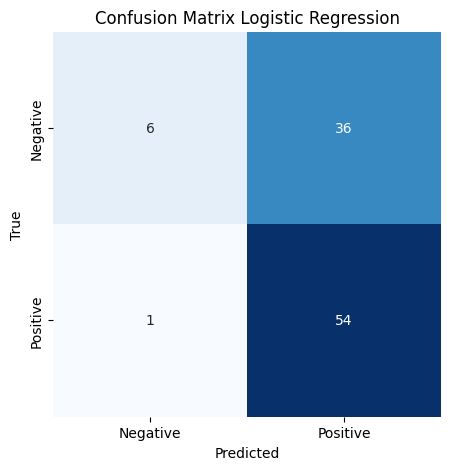

In [52]:
cm = confusion_matrix(y_test, y_pred)

labels = ['Negative', 'Positive']

plt.figure(figsize=(5, 5))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

##### Decision Tree

- Training dan Evaluasi model Decision Tree

In [53]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Evaluasi model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print hasil
print("Akurasi: {:.2f}%\n".format(accuracy * 100))
print(classification_report(y_test, y_pred))

Akurasi: 75.26%

              precision    recall  f1-score   support

    negative       0.72      0.69      0.71        42
    positive       0.77      0.80      0.79        55

    accuracy                           0.75        97
   macro avg       0.75      0.75      0.75        97
weighted avg       0.75      0.75      0.75        97



- Confusion Matrix

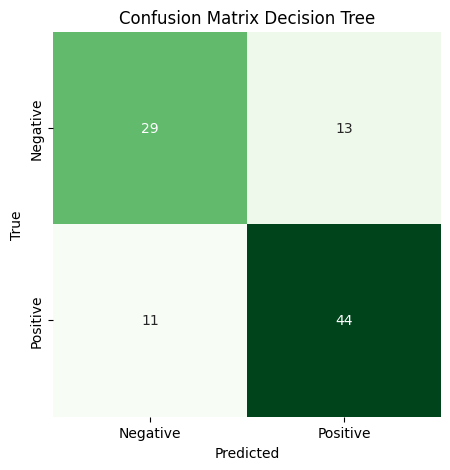

In [54]:
cm = confusion_matrix(y_test, y_pred)

labels = ['Negative', 'Positive']

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Greens",
            cbar=False,
            xticklabels = labels,
            yticklabels = labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Decision Tree')
plt.show()

##### Prediction

In [55]:
ruu_cleaned_df['sentiment ML'] = dt_model.predict(vectorizer.transform(ruu_cleaned_df['tweet_stem']))

# Menyimpan DataFrame ke dalam file CSV
ruu_cleaned_df.to_csv('ruu_cleaned_data.csv', index=False)

<ipython-input-55-459557bbb70c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ruu_cleaned_df['sentiment ML'] = dt_model.predict(vectorizer.transform(ruu_cleaned_df['tweet_stem']))


In [56]:
ruu_cleaned_df

,date,username,tweet_stem,score lexicon,sentiment lexicon,sentiment ML
0,2023-07-15 11:47:52+00:00,SholikhahWiwik,kabar ruu sehat sah perhati bukti dedikasi negara kapitalisme,-1,negative,negative
1,2023-07-15 11:44:11+00:00,adiawae,ruu sehat memcangkup ttg obat farmasi,0,negative,positive
2,2023-07-15 11:26:04+00:00,kompascom,idi bantu dokter diaspora mudah indonesia ruu sehat sah,5,positive,positive
3,2023-07-15 11:17:24+00:00,eksporjahe,ambune osjur fh ngomongke ruu sehat,3,positive,positive
4,2023-07-15 10:25:28+00:00,NordickVv,dukung ruu sehat ruu idi kuasa dokter indonesia paksa kerja disingapore karna izin praktik idi pulang praktik indonesia,4,positive,positive
...,...,...,...,...,...,...
484,2023-07-12 20:38:45+00:00,21_mozza,aamiin wajib sweeping akar karna petaka negri asal hewan moncong putih baru bijak tumbal rakyat ruukesehatan,-13,negative,negative
485,2023-07-12 20:34:38+00:00,imediacyber,tolak ruu sehat pks sesal perintah dengar aspirasi nakes,-2,negative,negative
486,2023-07-12 20:33:01+00:00,imediacyber,mandatory spending hapus pks konsisten tolak kesah ruu sehat,-2,negative,negative
487,2023-07-12 20:13:34+00:00,AryaZulvikar,ruu sehat masuk akal umur hidup ktp panjang ijin praktek dokter asing wajar masuk org indo g obat malaysiaamp singapura,-9,negative,negative


- Perbandingan hasil jumlah tweet sentiment positive dan negative menggunakan `lexicon InSet` dan `Algoritma Decision Tree`

In [129]:
# Kolom sentiment (Lexicon InSet)
token_counts_sentiment = ruu_cleaned_df['sentiment lexicon'].value_counts(dropna=False)
# Kolom "sentiment ML" (Decision Tree)
token_counts_sentiment_ml = ruu_cleaned_df['sentiment ML'].value_counts(dropna=False)

# Menampilkan hasil perbandingan
print("Jumlah sentiment pada kolom 'sentiment':")
print(token_counts_sentiment)
print("==========================================")
print("Jumlah sentiment pada kolom 'sentiment ML':")
print(token_counts_sentiment_ml)

Jumlah sentiment pada kolom 'sentiment':
positive    294
negative    189
Name: sentiment lexicon, dtype: int64
Jumlah sentiment pada kolom 'sentiment ML':
positive    297
negative    186
Name: sentiment ML, dtype: int64


# `Section 5` Analyze & Exploration

- Visualisasi Perbandingan Hasil Sentimen (Lexicon-based dan Decision Tree)

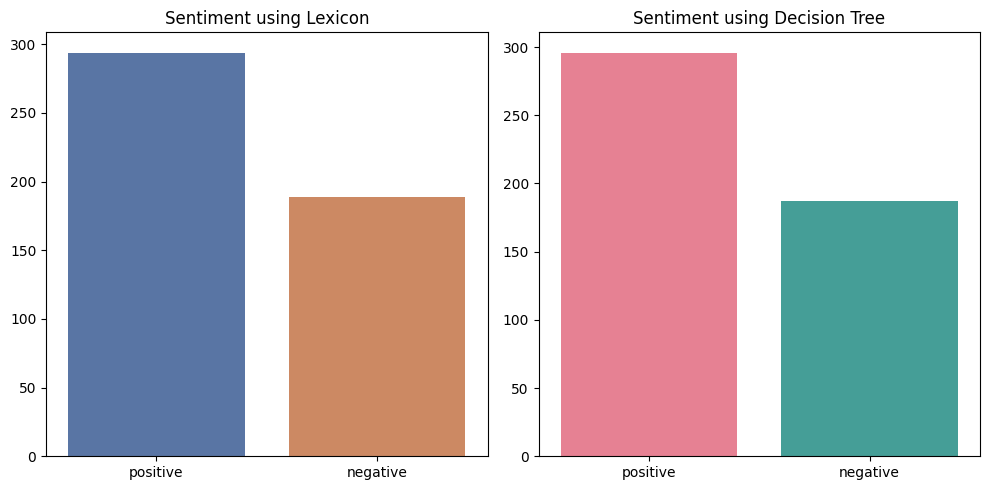

In [57]:
# Membuat visualisasi barplot dalam satu figure
plt.figure(figsize=(10, 5))

# Barplot pertama
plt.subplot(1, 2, 1)
sentiment_count = ruu_cleaned_df["sentiment lexicon"].value_counts()

sns.barplot(x = sentiment_count.index,
            y = sentiment_count.values,
            palette='deep')
plt.title('Sentiment using Lexicon')
plt.xticks(rotation=0)

# Barplot pertama
plt.subplot(1, 2, 2)
sentiment_ml_count = ruu_cleaned_df["sentiment ML"].value_counts()
sns.barplot(x = sentiment_ml_count.index,
            y = sentiment_ml_count.values,
            palette='husl')
plt.title('Sentiment using Decision Tree')
plt.xticks(rotation=0)

plt.tight_layout()  # Untuk menjaga tata letak agar lebih rapi
plt.show()

##### Visualisasi `Lexicon` Sentiment Analysis

- Pie chart

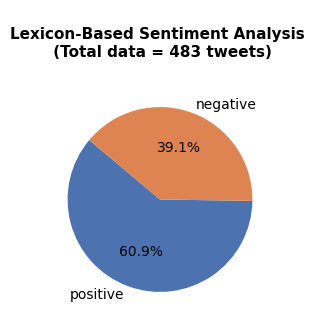

In [58]:
colors = sns.color_palette('deep')
plt.figure(figsize=(4, 3))
plt.pie(sentiment_count,
        labels=sentiment_count.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)

plt.title("\nLexicon-Based Sentiment Analysis \n (Total data = 483 tweets)",
          fontsize=11, fontweight='bold', pad=20)
plt.show()

In [59]:
print("Number of (+) tweets: {}".format(ruu_cleaned_df[ruu_cleaned_df["sentiment lexicon"]=="positive"].count()[0]))
print("Number of (-) tweets: {}".format(ruu_cleaned_df[ruu_cleaned_df["sentiment lexicon"]=="negative"].count()[0]))

Number of (+) tweets: 294
Number of (-) tweets: 189


- Wordcloud Sentiment Lexicon Positive

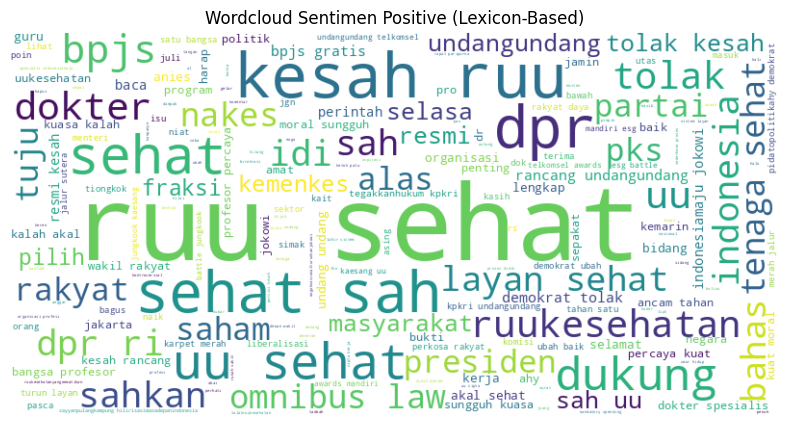

In [61]:
# Import WordCloud
from wordcloud import WordCloud

# Menggabungkan seluruh teks dari kolom "tweets_clean" yang memiliki sentimen "positive" menjadi satu teks
positive_text = " ".join(tweets_clean for tweets_clean in ruu_cleaned_df[ruu_cleaned_df['sentiment lexicon'] == 'positive']['tweet_stem'])

# Membuat Word Cloud
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white').generate(positive_text)

# Menampilkan Word Cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positive (Lexicon-Based)')
plt.show()

- Wordcloud Sentiment Lexicon Negative

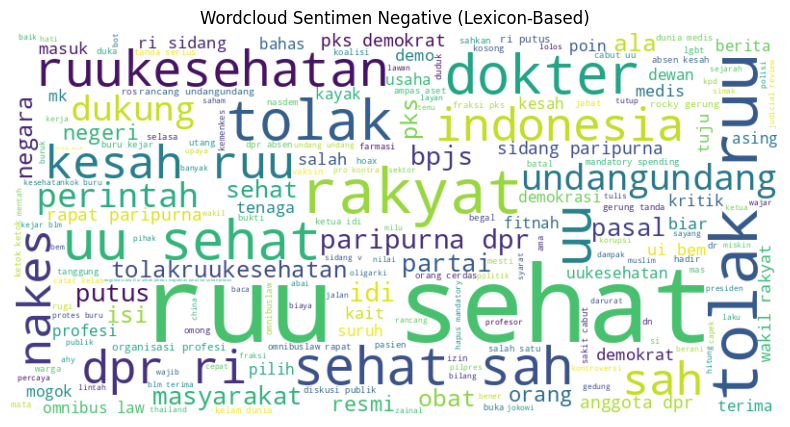

In [62]:
# Menggabungkan seluruh teks dari kolom "tweets_clean" yang memiliki sentimen "negative" menjadi satu teks
neg_text = " ".join(tweets_clean for tweets_clean in ruu_cleaned_df[ruu_cleaned_df['sentiment lexicon'] == 'negative']['tweet_stem'])

# Membuat Word Cloud
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white').generate(neg_text)

# Menampilkan Word Cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Negative (Lexicon-Based)')
plt.show()

##### Visualisasi `Decision Tree` Sentiment Analysis

- Pie chart

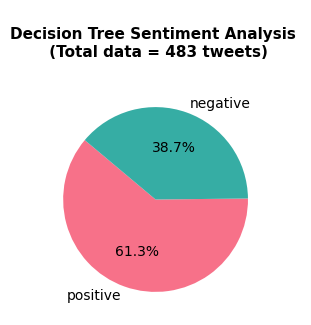

In [65]:
colors = sns.color_palette("husl", 2)
plt.figure(figsize=(4, 3))
plt.pie(sentiment_ml_count,
        labels=sentiment_ml_count.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)

plt.title("\nDecision Tree Sentiment Analysis \n (Total data = 483 tweets)",
          fontsize=11, fontweight='bold', pad=20)
plt.show()

In [66]:
print("Number of (+) tweets: {}".format(ruu_cleaned_df[ruu_cleaned_df["sentiment ML"]=="positive"].count()[0]))
print("Number of (-) tweets: {}".format(ruu_cleaned_df[ruu_cleaned_df["sentiment ML"]=="negative"].count()[0]))

Number of (+) tweets: 296
Number of (-) tweets: 187


- Wordcloud Sentiment Positive

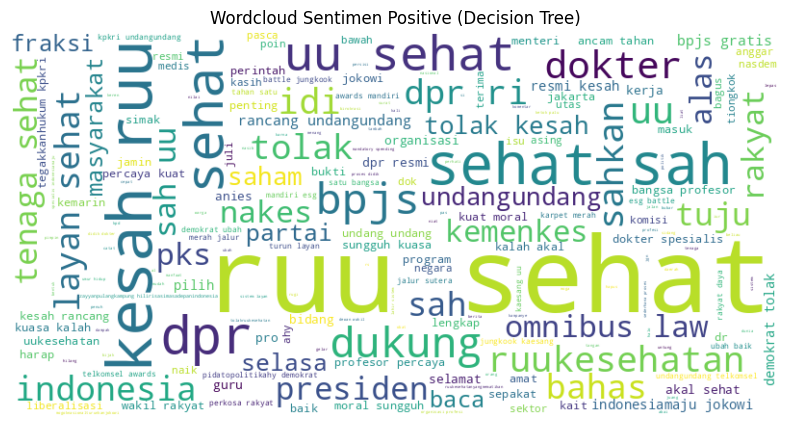

In [68]:
positive_text1 = " ".join(tweets_clean for tweets_clean in ruu_cleaned_df[ruu_cleaned_df['sentiment ML'] == 'positive']['tweet_stem'])

# Membuat Word Cloud
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white').generate(positive_text1)

# Menampilkan Word Cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positive (Decision Tree)')
plt.show()

- Wordcloud Sentiment Negative

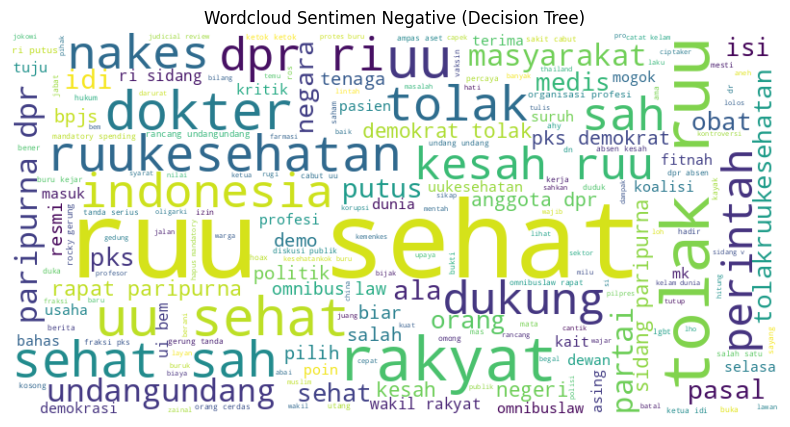

In [69]:
# Menggabungkan seluruh teks dari kolom "tweets_clean" yang memiliki sentimen "negative" menjadi satu teks
neg_text1 = " ".join(tweets_clean for tweets_clean in ruu_cleaned_df[ruu_cleaned_df['sentiment ML'] == 'negative']['tweet_stem'])

# Membuat Word Cloud
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white').generate(neg_text1)

# Menampilkan Word Cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Negative (Decision Tree)')
plt.show()